In [ ]:
#https://machinelearningmastery.com/autoencoder-for-classification/

In [2]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
#from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf
from tensorflow.keras import regularizers

from tensorflow.keras import layers
from tensorflow.keras import losses

from collections import Counter


import pandas as pd
import numpy as np

import sklearn


from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


import seaborn as sns

import pydot



In [4]:
data_train = pd.read_csv('/content/train.csv')
data_train.head()

ID  ... Sub-task B
0  C45.451  ...       NGEN
1   C47.11  ...       NGEN
2   C33.79  ...       NGEN
3  C4.1961  ...       NGEN
4  C10.153  ...       NGEN

[5 rows x 4 columns]

In [5]:

data_test = pd.read_csv('/content/test.csv')


In [6]:
data_train.drop(['ID','Sub-task B'], axis=1, inplace=True)
data_test.drop(['ID','Sub-task B'], axis=1, inplace=True)




In [7]:
NAG_train = data_train[(data_train['Sub-task A']=='NAG')]
OAG_train = data_train[(data_train['Sub-task A']=='CAG')]
CAG_train = data_train[(data_train['Sub-task A']=='OAG')]

In [8]:
NAG_test = data_test[(data_test['Sub-task A']=='NAG')]
OAG_test= data_test[(data_test['Sub-task A']=='CAG')]
CAG_test = data_test[(data_test['Sub-task A']=='OAG')]

In [9]:
import warnings as wrn
wrn.filterwarnings('ignore')

NAG_train["Sub-task A"] = 0 
#negatives_test["Sentiment"] = 0

OAG_train["Sub-task A"] = 1
#positives_test["Sentiment"] = 2

CAG_train["Sub-task A"] = 2
#neutrals_test["Sentiment"] = 1

#NAG_train.head()

In [10]:
import warnings as wrn
wrn.filterwarnings('ignore')

NAG_test["Sub-task A"] = 0 
#negatives_test["Sentiment"] = 0

OAG_test["Sub-task A"] = 1
#positives_test["Sentiment"] = 2

CAG_test["Sub-task A"] = 2
#neutrals_test["Sentiment"] = 1

NAG_test.head()

Text  Sub-task A
0        U deserve more subscribers. U really great.           0
1                                     Nice video....           0
2  sorry if i bother somebody.. iam a defence asp...           0
3  Joker was amazing....it was not glamorised !.....           0
4                                          Nice baro           0

In [11]:
data_train = pd.concat([NAG_train,
                 OAG_train,
                  CAG_train
                ],axis=0)

data_train.reset_index(inplace=True)

In [12]:
data_test = pd.concat([NAG_test,
                  OAG_test,
                  CAG_test
                 ],axis=0)

data_test.reset_index(inplace=True)

In [13]:

data_test = data_test.rename(columns = {'Sub-task A': 'label'}, inplace = False)

In [14]:

data_train = data_train.rename(columns = {'Sub-task A': 'label'}, inplace = False)

In [15]:
data_train

index                                               Text  label
0         0                                          Next part      0
1         1                 Iii8mllllllm\nMdxfvb8o90lplppi0005      0
2         2  🤣🤣😂😂🤣🤣🤣😂osm vedio ....keep it up...make more v...      0
3         3  What the fuck was this? I respect shwetabh and...      0
4         4  Concerned authorities should bring arundathi R...      0
...     ...                                                ...    ...
4258   4238  Personality of a beggar lasts with her/him eve...      2
4259   4245  Ghanta..ek no ek chutiya galti se iski video l...      2
4260   4253           Ban suedo femists and liberals ...F..off      2
4261   4254                                Open bob and vagane      2
4262   4258  Abey loudey Arnab... Did u ever see the vedios...      2

[4263 rows x 3 columns]

In [16]:
data_train.drop(['index'], axis=1, inplace=True)

In [17]:
X = data_train.Text
Y = data_train.label
#le = LabelEncoder()
#Y = le.fit_transform(Y)
#Y = Y.reshape(-1,1)

In [18]:
X_train,X_valid,y_train,y_valid = train_test_split(X,Y,test_size=0.15)

In [19]:
num_words = 50000

tokenizer = Tokenizer(num_words=num_words,oov_token="unk")
tokenizer.fit_on_texts(X_train)


print(str(tokenizer.texts_to_sequences(['xyz how are you'])))

[[3254, 74, 12, 9]]


In [20]:

x_train = np.array( tokenizer.texts_to_sequences(X_train) )
x_valid = np.array( tokenizer.texts_to_sequences(X_valid) )
x_test  = np.array( tokenizer.texts_to_sequences(data_test['Text'].tolist()) )


In [21]:

x_train = pad_sequences(x_train, padding='post', maxlen=150)
x_valid = pad_sequences(x_valid, padding='post', maxlen=150)
x_test = pad_sequences(x_test, padding='post', maxlen=150)

In [23]:
train_labels = np.asarray(y_train )
valid_labels = np.asarray( y_valid)

test_labels = np.asarray(data_test['label'].tolist())

In [24]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train,train_labels))
valid_ds = tf.data.Dataset.from_tensor_slices((x_valid,valid_labels))
test_ds = tf.data.Dataset.from_tensor_slices((x_test,test_labels))

In [25]:
x_train

array([[  69,   24,   90, ...,    0,    0,    0],
       [ 306,  647,  599, ...,    0,    0,    0],
       [1813,  451,    0, ...,    0,    0,    0],
       ...,
       [  74,   61,   24, ...,    0,    0,    0],
       [  57,  151,    4, ...,    0,    0,    0],
       [   9,  136,  409, ...,    0,    0,    0]], dtype=int32)

In [26]:

# train autoencoder for classification with no compression in the bottleneck layer
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot

In [27]:
n_inputs = X.shape

In [28]:
t = MinMaxScaler()
t.fit(x_train)
x_train = t.transform(x_train)
x_test = t.transform(x_test)

In [29]:
sequence_length = 150

In [30]:
n_inputs = sequence_length

In [31]:

# define encoder
visible = Input(shape=(n_inputs,))
# encoder level 1
e = Dense(n_inputs*2)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 2
e = Dense(n_inputs)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# bottleneck
n_bottleneck = n_inputs
bottleneck = Dense(n_bottleneck)(e)

In [32]:
from google.colab import drive



In [33]:
drive.mount('/content/drive')

Mounted at /content/drive


In [34]:
filepath = "/content/drive/MyDrive/Aggression_detection/autoencoderLSTM_without__aug/encoder_eng_file/encoder1.h5"



In [35]:
from keras.models import load_model


Epoch 1/30
227/227 - 2s - loss: 0.0492 - val_loss: 0.0043
Epoch 2/30
227/227 - 1s - loss: 0.0061 - val_loss: 0.0036
Epoch 3/30
227/227 - 1s - loss: 0.0055 - val_loss: 0.0042
Epoch 4/30
227/227 - 1s - loss: 0.0054 - val_loss: 0.0034
Epoch 5/30
227/227 - 1s - loss: 0.0053 - val_loss: 0.0027
Epoch 6/30
227/227 - 1s - loss: 0.0050 - val_loss: 0.0028
Epoch 7/30
227/227 - 1s - loss: 0.0049 - val_loss: 0.0029
Epoch 8/30
227/227 - 1s - loss: 0.0048 - val_loss: 0.0035
Epoch 9/30
227/227 - 1s - loss: 0.0047 - val_loss: 0.0030
Epoch 10/30
227/227 - 1s - loss: 0.0046 - val_loss: 0.0025
Epoch 11/30
227/227 - 1s - loss: 0.0043 - val_loss: 0.0027
Epoch 12/30
227/227 - 1s - loss: 0.0043 - val_loss: 0.0023
Epoch 13/30
227/227 - 1s - loss: 0.0040 - val_loss: 0.0022
Epoch 14/30
227/227 - 1s - loss: 0.0040 - val_loss: 0.0024
Epoch 15/30
227/227 - 1s - loss: 0.0037 - val_loss: 0.0020
Epoch 16/30
227/227 - 1s - loss: 0.0037 - val_loss: 0.0026
Epoch 17/30
227/227 - 1s - loss: 0.0037 - val_loss: 0.0024
Epoch 

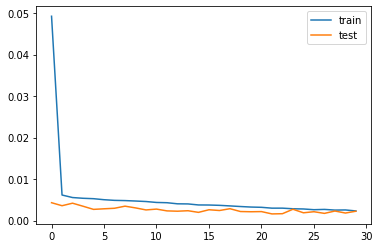

In [37]:
# define decoder, level 1
d = Dense(n_inputs)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# decoder level 2
d = Dense(n_inputs*2)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# output layer
output = Dense(n_inputs, activation='linear')(d)
# define autoencoder model
model = Model(inputs=visible, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')
# plot the autoencoder
plot_model(model, 'autoencoder_no_compress.png', show_shapes=True)
# fit the autoencoder model to reconstruct input
history = model.fit(x_train, x_train, epochs=30, batch_size=16, verbose=2, validation_data=(x_test,x_test))
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
# define an encoder model (without the decoder)
encoder = Model(inputs=visible, outputs=bottleneck)
plot_model(encoder, 'encoder_no_compress.png', show_shapes=True)
# save the encoder to file
encoder.save(filepath)

In [38]:

# baseline in performance with logistic regression model
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# define model
model = LogisticRegression()
# fit model on training set
model.fit(x_train, y_train)
# make prediction on test set
yhat = model.predict(x_test)
# calculate accuracy
acc = accuracy_score(test_labels, yhat)
print(acc)

0.7851782363977486


In [39]:

encoder = load_model('/content/drive/MyDrive/Aggression_detection/autoencoderLSTM_without__aug/encoder_eng_file/encoder1.h5')

In [40]:

# encode the train data
X_train_encode = encoder.predict(x_train)
# encode the test data
X_test_encode = encoder.predict(x_test)

In [41]:

# define the model
model = LogisticRegression()
# fit the model on the training set
model.fit(X_train_encode, train_labels)
# make predictions on the test set
yhat = model.predict(X_test_encode)

In [42]:

acc = accuracy_score(test_labels, yhat)
print(acc)

0.7786116322701688


In [43]:
data_test['pred']= yhat

In [44]:

labels = [0,1,2]
    
print(classification_report(data_test['label'].tolist(),data_test['pred'].tolist(),labels=labels))

              precision    recall  f1-score   support

           0       0.79      0.99      0.88       836
           1       0.21      0.03      0.05       117
           2       0.33      0.02      0.03       113

    accuracy                           0.78      1066
   macro avg       0.45      0.34      0.32      1066
weighted avg       0.68      0.78      0.70      1066

